In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split as tts,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.metrics import ConfusionMatrixDisplay as cmd,confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [2]:
data=pd.read_csv('mushrooms-full-dataset.csv',delimiter=',')

### Spliting the data {train/test}

In [3]:
inputs=data.drop('poisonous',axis=1)
outputs=data['poisonous']
x_train,x_test,y_train,y_test=tts(inputs,outputs,test_size=0.2,
                                  random_state=42,
                                  stratify=outputs)

### Encoding the data

In [4]:
le=LabelEncoder()
oe=OrdinalEncoder()
x_train_encoded=oe.fit_transform(x_train)
y_train_encoded=le.fit_transform(y_train)
x_test_encoded=oe.transform(x_test)
y_test_encoded=le.transform(y_test)

### Rescaling the data

rescaling inputs to be inrange [-1,1] for svm sake

In [5]:
mms=mms(feature_range=(-1,1))
x_train_scaled=mms.fit_transform(x_train_encoded)
x_test_scaled=mms.transform(x_test_encoded)

### Classification svc

In [6]:
svc=svm.SVC(kernel='linear',C=1)
svc.fit(x_train_scaled,y_train_encoded)

SVC(C=1, kernel='linear')

In [7]:
y_pred=svc.predict(x_test_scaled)

In [8]:
cm=cm(y_test_encoded,y_pred,labels=svc.classes_)

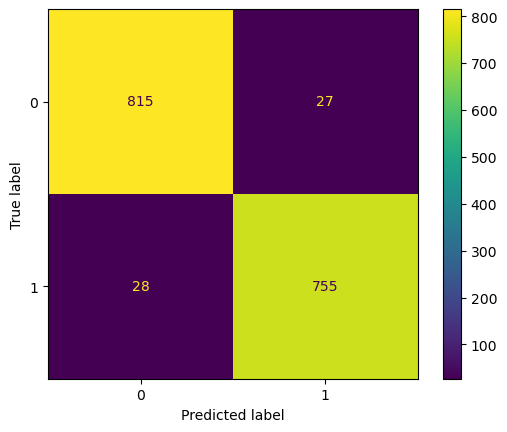

In [9]:
cmd=cmd(cm,display_labels=svc.classes_)
cmd.plot()

In [10]:
print(cr(y_test_encoded,y_pred,target_names=['edible','poisenous']))

              precision    recall  f1-score   support

      edible       0.97      0.97      0.97       842
   poisenous       0.97      0.96      0.96       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [11]:
#Gamma controls the raduis of the area of the sv boundry
#Large gamma -Model overfits
#Small gamma -Model underfits

### Hyperparameter Tuning with gridsearchCV

In [12]:
tuned_parameters=[
        {'kernel':['linear'],'C':[1,10]},
        {'kernel':['poly'],'C':[1,10]},
        {'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10]}
]

randomizedsearch CV searches over a fixed subsample of all given parameters to find the best solution

In [13]:
scores=['precision','recall']

In [14]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_scaled, y_train_encoded)
    print('--------------------------------------------------------------')
    print("Best para-set:",clf.best_params_)
    print('--------------------------------------------------------------')
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print('--------------------------------------------------------------')

# Tuning hyper-parameters for precision
--------------------------------------------------------------
Best para-set: {'C': 10, 'kernel': 'poly'}
--------------------------------------------------------------
Grid scores on development set:
0.951 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.959 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.926 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.895 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.926 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
--------------------------------------------------------------
# Tuning hyper-parameters for recall
--------------------------------------------------------------
Best para-set: {'C': 10, 'kernel': 'poly'}
--------------------------------------------------------------
Grid scores on development set:
0.95